In [49]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


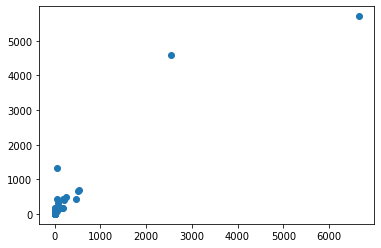

In [50]:
mammals = pd.read_csv("../data/mammals.csv")
plt.scatter(mammals['body'], mammals['brain'])

In [51]:
body_data = mammals["body"]
body_data.shape

(62,)

In [52]:
brain_data = mammals["brain"]
brain_data.shape

(62,)

In [53]:
import statsmodels.api as sm
body_data = sm.add_constant(body_data)

In [54]:
regression1 = sm.OLS(brain_data, body_data).fit()

In [55]:
import statsmodels.formula.api as smf

In [56]:
regression2 = smf.ols(formula='brain ~ body', data=mammals).fit()

In [57]:
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.54e-28
Time:                        21:23:15   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.041       3.886     178.123
body           0.9665      0.048     20.278      0.000       0.871       1.062
==============================================================================
Omnibus:                       92.942   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1738.656
Skew:                           4.382   Prob(JB):                         0.00
Kurtosis:                      27.417   Cond. No.                         936.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
regression2.params

Intercept    91.004396
body          0.966496
dtype: float64

In [59]:
new_body =  np.linspace(0, 7000, 10)

In [60]:
brain_pred = regression2.predict(exog=dict(body=new_body))
print(brain_pred)

0      91.004396
1     842.723793
2    1594.443190
3    2346.162587
4    3097.881985
5    3849.601382
6    4601.320779
7    5353.040176
8    6104.759573
9    6856.478970
dtype: float64


In [61]:
body_data = mammals[['body']]
brain_data = mammals[['brain']]

In [62]:
print(body_data)

       body
0     3.385
1     0.480
2     1.350
3   465.000
4    36.330
..      ...
57  160.000
58    0.900
59    1.620
60    0.104
61    4.235

[62 rows x 1 columns]


In [63]:
from sklearn import linear_model
sk_regr = linear_model.LinearRegression()

In [64]:
sk_regr.fit(body_data, brain_data)

LinearRegression()

In [65]:
print(sk_regr.coef_)

[[0.96649637]]


In [66]:
print(sk_regr.intercept_)

[91.00439621]


In [67]:
print(sk_regr.score(body_data, brain_data))

0.8726620843043331


In [68]:
new_body = np.linspace(0, 7000, 10)
new_body = new_body[:, np.newaxis]
brain_pred = sk_regr.predict(new_body)
print(brain_pred)

[[  91.00439621]
 [ 842.72379329]
 [1594.44319036]
 [2346.16258744]
 [3097.88198452]
 [3849.6013816 ]
 [4601.32077868]
 [5353.04017576]
 [6104.75957284]
 [6856.47896992]]


In [69]:
from numpy import log

In [70]:
mammals['log_body'] = log(mammals['body'])
mammals['log_brain'] = log(mammals['brain'])

In [71]:
log_lm = smf.ols(formula= 'log_brain ~ log_body', data=mammals).fit()

In [72]:
log_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           9.84e-35
Time:                        21:23:16   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.000       1.943       2.327
log_body       0.7517      0.028     26.409      0.000       0.695       0.809
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.933
Skew:                           0.405   Prob(JB):                        0.380
Kurtosis:                       3.301   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
log_lm.ssr

28.92271042146064

In [74]:
from sklearn import preprocessing

In [75]:
scaler = preprocessing.MinMaxScaler()

In [76]:
mammals_minmax = pd.DataFrame(scaler.fit_transform(mammals[['body', 'brain']]), columns= ['body', 'brain'])
print(mammals_minmax)

        body     brain
0   0.000508  0.007766
1   0.000071  0.002689
2   0.000202  0.001394
3   0.069882  0.074032
4   0.005459  0.020897
..       ...       ...
57  0.024045  0.029563
58  0.000135  0.000431
59  0.000243  0.001971
60  0.000015  0.000413
61  0.000636  0.008799

[62 rows x 2 columns]


In [77]:
mammals_minmax.groupby(lambda idx: 0).agg(['min', 'max'])

body      brain     
   min  max   min  max
0  0.0  1.0   0.0  1.0

In [78]:
scaler2 = preprocessing.StandardScaler()

In [80]:
mammals_std = pd.DataFrame(scaler2.fit_transform(mammals[['body', 'brain']]), columns=['body', 'brain'])
print(mammals_std)

        body     brain
0  -0.219094 -0.258613
1  -0.222351 -0.290041
2  -0.221376 -0.298061
3   0.298483  0.151576
4  -0.182155 -0.177334
..       ...       ...
57 -0.043493 -0.123690
58 -0.221880 -0.304021
59 -0.221073 -0.294484
60 -0.222773 -0.304129
61 -0.218141 -0.252219

[62 rows x 2 columns]


In [81]:
mammals_std.groupby(lambda idx: 0).agg(['mean', 'std'])

body                   brain          
           mean       std          mean       std
0  1.790682e-18  1.008163 -3.223228e-17  1.008163

In [82]:
mammals['body_squared']=mammals['body']**2

In [83]:
poly_reg = smf.ols(formula='brain ~ body + body_squared', data=mammals).fit()

In [84]:
print(poly_reg.params)

Intercept       19.115299
body             2.123929
body_squared    -0.000189
dtype: float64


In [86]:
poly_brain_pred = poly_reg.predict(exog=dict(body=new_body, body_squared=new_body**2))
print(poly_brain_pred)

0      19.115299
1    1556.445107
2    2864.544483
3    3943.413428
4    4793.051941
5    5413.460023
6    5804.637672
7    5966.584891
8    5899.301677
9    5602.788032
dtype: float64


In [87]:
mammals['body_cubed'] = mammals['body']**3

In [88]:
from sklearn import preprocessing

In [89]:
X = mammals[['body', 'body_squared', 'body_cubed']]
Y = mammals[['brain']]

Xscaled = preprocessing.StandardScaler().fit_transform(X)
Yscaled = preprocessing.StandardScaler().fit_transform(Y)

In [90]:
Xscaled

array([[-2.19094031e-01, -1.48523288e-01, -1.35321658e-01],
       [-2.22351206e-01, -1.48525285e-01, -1.35321659e-01],
       [-2.21375735e-01, -1.48525002e-01, -1.35321659e-01],
       [ 2.98482794e-01, -1.10062655e-01, -1.32614182e-01],
       [-1.82155092e-01, -1.48290545e-01, -1.35320367e-01],
       [-1.91876160e-01, -1.48389233e-01, -1.35321089e-01],
       [-2.06261548e-01, -1.48486205e-01, -1.35321571e-01],
       [-2.21723317e-01, -1.48525134e-01, -1.35321659e-01],
       [-2.18191440e-01, -1.48522203e-01, -1.35321657e-01],
       [-2.22412873e-01, -1.48525294e-01, -1.35321659e-01],
       [-2.22776152e-01, -1.48525324e-01, -1.35321659e-01],
       [-2.21857864e-01, -1.48525176e-01, -1.35321659e-01],
       [-2.21768166e-01, -1.48525148e-01, -1.35321659e-01],
       [-2.22883790e-01, -1.48525326e-01, -1.35321659e-01],
       [-2.22822123e-01, -1.48525326e-01, -1.35321659e-01],
       [-2.18965090e-01, -1.48523147e-01, -1.35321658e-01],
       [-2.20646935e-01, -1.48524615e-01

In [93]:
mammals['body_cubed'] = mammals['body']**3

In [97]:
from sklearn import preprocessing
X = mammals[['body', 'body_squared', 'body_cubed']]
Y = mammals[['brain']]
print(X)
print(Y)

       body   body_squared    body_cubed
0     3.385      11.458225  3.878609e+01
1     0.480       0.230400  1.105920e-01
2     1.350       1.822500  2.460375e+00
3   465.000  216225.000000  1.005446e+08
4    36.330    1319.868900  4.795084e+04
..      ...            ...           ...
57  160.000   25600.000000  4.096000e+06
58    0.900       0.810000  7.290000e-01
59    1.620       2.624400  4.251528e+00
60    0.104       0.010816  1.124864e-03
61    4.235      17.935225  7.595568e+01

[62 rows x 3 columns]
    brain
0    44.5
1    15.5
2     8.1
3   423.0
4   119.5
..    ...
57  169.0
58    2.6
59   11.4
60    2.5
61   50.4

[62 rows x 1 columns]


In [98]:
Xscaled = preprocessing.StandardScaler().fit_transform(X)
Yscaled = preprocessing.StandardScaler().fit_transform(Y)

In [99]:
import sklearn.model_selection as ms

In [101]:
XTrain, XTest, yTrain, yTest = ms.train_test_split(Xscaled , Yscaled,  test_size=0.2, random_state=42)

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

lambda_range = np.linspace(0.001, 0.2, 25)
lambda_grid = [{'alpha': lambda_range}]

In [104]:
model1 = Ridge(max_iter=10000)
cv_ridge = GridSearchCV(estimator=model1, param_grid=lambda_grid, cv=ms.KFold(n_splits=20))
cv_ridge.fit(XTrain, yTrain)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=Ridge(max_iter=10000),
             param_grid=[{'alpha': array([0.001     , 0.00929167, 0.01758333, 0.025875  , 0.03416667,
       0.04245833, 0.05075   , 0.05904167, 0.06733333, 0.075625  ,
       0.08391667, 0.09220833, 0.1005    , 0.10879167, 0.11708333,
       0.125375  , 0.13366667, 0.14195833, 0.15025   , 0.15854167,
       0.16683333, 0.175125  , 0.18341667, 0.19170833, 0.2       ])}])

In [106]:
model2 = Lasso(max_iter=10000)
cv_lasso = GridSearchCV(estimator=model2, param_grid=lambda_grid, cv=ms.KFold(n_splits=20))
cv_lasso.fit(XTrain, yTrain)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
             estimator=Lasso(max_iter=10000),
             param_grid=[{'alpha': array([0.001     , 0.00929167, 0.01758333, 0.025875  , 0.03416667,
       0.04245833, 0.05075   , 0.05904167, 0.06733333, 0.075625  ,
       0.08391667, 0.09220833, 0.1005    , 0.10879167, 0.11708333,
       0.125375  , 0.13366667, 0.14195833, 0.15025   , 0.15854167,
       0.16683333, 0.175125  , 0.18341667, 0.19170833, 0.2       ])}])

In [108]:
bestLambda_ridge = cv_ridge.best_params_['alpha']
bestLambda_lasso = cv_lasso.best_params_['alpha']

In [109]:
Brain_lasso = Lasso(alpha=bestLambda_lasso, max_iter=10000)
Brain_lasso.fit(XTrain, yTrain)
print(Brain_lasso.coef_)

[ 1.65028091 -0.         -0.76712502]


In [110]:
Brain_ridge = Ridge(alpha=bestLambda_ridge, max_iter=10000)
Brain_ridge.fit(XTrain, yTrain)
print(Brain_ridge.coef_)

[[ 1.62505091  0.39864181 -1.1450847 ]]
